### Load data

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import pickle

In [2]:
with open('/preprocessing/processed_data.pickle','rb') as f:
    preproc_data = pickle.load(f)

In [3]:
cytokine_df = preproc_data['cytokine_data']
patient_meta = preproc_data['metadata'] 
patient_info = preproc_data['clinical'] 

### Train data prerparing

In [4]:
normal_df = cytokine_df[cytokine_df.index.str.contains('Healthy')]
severe_samples = patient_meta[patient_meta.Severity >= 6]
severe_df = cytokine_df[cytokine_df.index.isin(severe_samples.Sample)]

In [5]:
normal_df['source'] = 0
severe_df['source'] = 1

/tmp/ipykernel_80334/1617201421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_df['source'] = 0
/tmp/ipykernel_80334/1617201421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severe_df['source'] = 1


In [6]:
normal_df,severe_df

(            CXCL9        LIF   CXCL11       IL25    IL12B       IL10  \
 Healthy1  6.560136  4.251866  4.151513  7.586942  5.541050  1.843384   
 Healthy2  5.277100  4.089332  3.650800  7.886990  6.377469  2.113211   
 
              IL13       IL11     IL15      PTX3   ...    FSTL3    FLT3LG   \
 Healthy1  6.470743  6.949630  3.716450  5.163174  ...  9.613881  4.906822   
 Healthy2  6.450212  7.541794  4.181554  6.741940  ...  9.458981  4.658021   
 
                FAP     FABP4         F3     ESM1     ERBB3      ENPP2   \
 Healthy1  10.903602  7.923477  3.383774  6.034197  9.096096  10.839433   
 Healthy2  11.238270  8.730215  3.317157  5.497652  8.543655  10.454511   
 
             WFDC2   source  
 Healthy1  8.383246       0  
 Healthy2  8.260845       0  
 
 [2 rows x 167 columns],
               CXCL9        LIF   CXCL11       IL25    IL12B       IL10  \
 Patient2_1  7.426598  4.211594  4.429560  7.799068  6.318247  1.769972   
 Patient2_2  7.541794  4.355353  4.514350  7.8869

### Model training

In [7]:
#Generally, model training consists of splitted datasets which consist of Train vs. Test.
#However, the partial dataset is too small, so we can provide example code for training set.

df = pd.concat([normal_df,severe_df],axis = 0)

In [8]:
X = df.drop(columns=['source'])
y = df['source']

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#Assume X_train as X, y as well

X_train = X
y_train = y

In [10]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [11]:
X_train

,CXCL9,LIF,CXCL11,IL25,IL12B,IL10,IL13,IL11,IL15,PTX3,...,FURIN,FSTL3,FLT3LG,FAP,FABP4,F3,ESM1,ERBB3,ENPP2,WFDC2
Healthy1,6.560136,4.251866,4.151513,7.586942,5.541050,1.843384,6.470743,6.949630,3.716450,5.163174,...,6.883351,9.613881,4.906822,10.903602,7.923477,3.383774,6.034197,9.096096,10.839433,8.383246
Healthy2,5.277100,4.089332,3.650800,7.886990,6.377469,2.113211,6.450212,7.541794,4.181554,6.741940,...,7.002611,9.458981,4.658021,11.238270,8.730215,3.317157,5.497652,8.543655,10.454511,8.260845
Patient2_1,7.426598,4.211594,4.429560,7.799068,6.318247,1.769972,5.725485,6.782954,3.716450,8.190382,...,7.660761,8.802718,3.042321,7.886990,9.296877,2.952843,5.214755,8.543655,9.096096,8.909767
Patient2_2,7.541794,4.355353,4.514350,7.886990,6.741940,1.769972,5.843465,6.646599,3.716450,7.496809,...,7.210939,9.008530,3.317157,8.110591,9.168168,2.820616,5.497652,8.683792,9.296877,8.862940
Patient2_3,7.541794,4.151513,3.933607,7.799068,6.159825,1.916796,5.984188,6.701283,3.880626,7.210939,...,6.646599,9.214496,3.448254,8.190382,9.296877,3.232241,5.306376,8.862940,9.535287,8.909767
Patient2_4,7.130935,4.429560,3.585707,7.886990,5.612199,1.916796,6.214099,6.883351,3.933607,7.496809,...,6.532043,9.008530,3.448254,8.383246,9.296877,3.127159,5.306376,9.096096,9.613881,8.683792


In [12]:
# Let's assume test set as well
y_test = y
X_test = X

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


In [13]:
print(accuracy)

1.0


### Confusion matrix

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


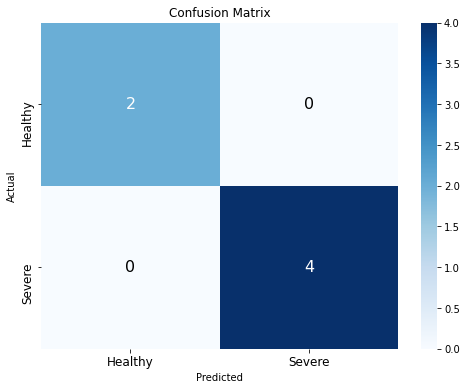

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=False, fmt="d", cmap="Blues", 
            xticklabels=['Healthy','Severe'], yticklabels=['Healthy','Severe']
           ,annot_kws={"fontsize": 14},)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick label size

for i in range(len(rf_model.classes_)):
    for j in range(len(rf_model.classes_)):
        if i == j:  # Condition to check diagonal cells (true positives)
            plt.text(j + 0.5, i + 0.5, conf_matrix[i, j],
                     ha="center", va="center", color='white', fontsize=16)
        else:
            plt.text(j + 0.5, i + 0.5, conf_matrix[i, j],
                     ha="center", va="center", color='black', fontsize=16)

plt.show()


### Save model

In [16]:
import joblib
joblib.dump(rf_model, '/model/rf_model.pkl') 

['/data1/home/EYH/network/shap_git_scripts/rf_model.pkl']